In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##### Quiz 2 - Regression (Supervised Learning)


##### Part 2 - (100pts)

A hospital availed of your expertise to help them with their cardiology department. Upon collecting several
data sets, they would like to have an assistant program that will help them to determine the probability of
a heart attack. The following are the things they can ask/check with the patient upon entry:

1. **Age and sex (gender):** (1 = male; 0 = female)
2. **cp:** chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 =
   asymptomatic)

3. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

4. **chol:** serum cholesterol in mg/dl

5. **thalach:** maximum heart rate achieved.

Using this information, determine the probability that a patient is/ will be suffering a heart attack.

If a patient is not admitted (the probability is too low), the program must suggest that the patient be
admitted to the normal ward for further checking.

If a patient is admitted (probability is high), the program must suggest having the patient be tested and
record the following:

1. **fbs:** fasting blood sugar (1 = true; 0 = false)
2. **restecg:** resting electrocardiographic results.

   - 0 = normal
   - 1 = having ST-T wave abnormality
   - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

3. **thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect

Three additional pieces of information will be added to determine the probability of a heart attack. If the
probability computed consists of or is near the value initially obtained, the program will recommend
specialist intervention and will print a report containing the information of the patient

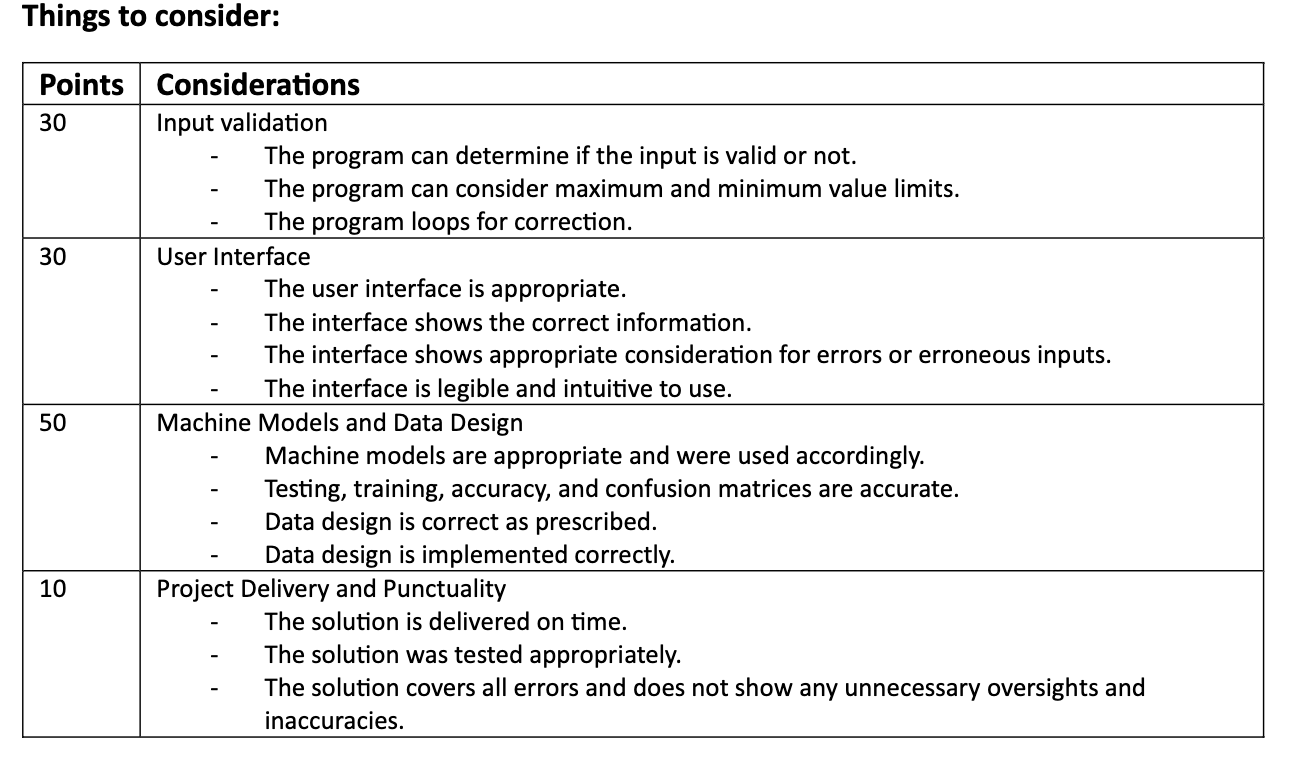


Based on the heatmap above we can see that the smoker feature is highly correlated to the charges feature.


### Load the dataset


In [108]:
df = pd.read_csv("datasets/heart_attack-quiz-2.csv")

df.head()

,heart_disease,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0,3


#### 1. Train a model that uses age, gender, cp, trestbps, chol, and thalach to predict whether a patient will have a heart attack or not.


In [109]:
initial_features = ["age", "gender", "cp", "trestbps", "chol", "thalach"]
initial_h_attack_x = df[initial_features]
initial_h_attack_y = df["heart_disease"]

# Splitting the data into training and testing sets
initial_x_train, initial_x_test, initial_y_train, initial_y_test = train_test_split(
    initial_h_attack_x, initial_h_attack_y, test_size=0.3, random_state=0
)

# Train the model
initial_h_attack_classifier = LogisticRegression(random_state=0, max_iter=1000)
initial_h_attack_classifier.fit(initial_x_train, initial_y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [110]:
# Evaluate the model
score = initial_h_attack_classifier.score(initial_x_test, initial_y_test)
print(f"Score: {score * 100:.2f}%")

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    initial_h_attack_classifier, initial_h_attack_x, initial_h_attack_y, cv=5
)
print(f"Cross validation scores: {scores.mean() * 100:.2f}%")

Score: 74.44%
Cross validation scores: 77.11%


#### 2. Train a model using the previous features but adds fbs, restecg, and thal to predict whether a patient will have a heart attack or not.


In [111]:
admitted_features = initial_features + ["fbs", "restecg", "thal"]
admitted_h_attack_x = df[admitted_features]
admitted_h_attack_y = df["heart_disease"]

# Splitting the data into training and testing sets
admitted_x_train, admitted_x_test, admitted_y_train, admitted_y_test = train_test_split(
    admitted_h_attack_x, admitted_h_attack_y, test_size=0.3, random_state=0
)

# Train the model
admitted_h_attack_classifier = LogisticRegression(random_state=0, max_iter=1000)
admitted_h_attack_classifier.fit(admitted_x_train, admitted_y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [112]:
# Evaluate the model
score = admitted_h_attack_classifier.score(admitted_x_test, admitted_y_test)
print(f"Score: {score * 100:.2f}%")

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    admitted_h_attack_classifier, admitted_h_attack_x, admitted_h_attack_y, cv=5
)
print(f"Cross validation scores: {scores.mean() * 100:.2f}%")

Score: 80.00%
Cross validation scores: 81.46%


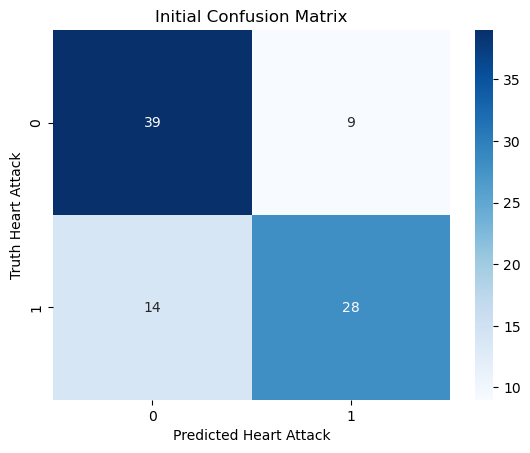

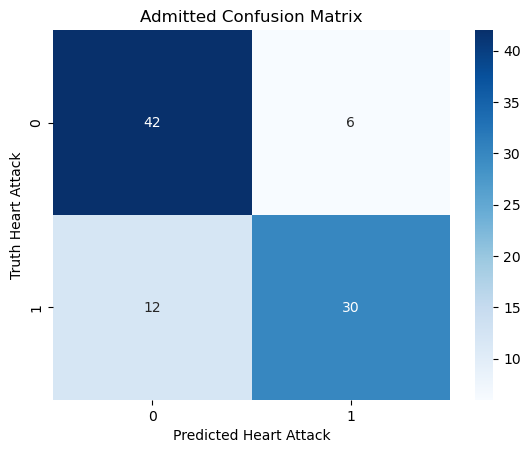

In [122]:
# Evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix

initial_y_pred = initial_h_attack_classifier.predict(initial_x_test)
initial_cm = confusion_matrix(initial_y_test, initial_y_pred)

# Plot the confusion matrix
sns.heatmap(initial_cm, annot=True, cmap="Blues")
plt.title("Initial Confusion Matrix")
plt.xlabel("Predicted Heart Attack")
plt.ylabel("Truth Heart Attack")
plt.show()

# Evaluate the model using confusion matrix
admitted_y_pred = admitted_h_attack_classifier.predict(admitted_x_test)
admitted_cm = confusion_matrix(admitted_y_test, admitted_y_pred)

# Plot the confusion matrix
sns.heatmap(admitted_cm, annot=True, cmap="Blues")
plt.title("Admitted Confusion Matrix")
plt.xlabel("Predicted Heart Attack")
plt.ylabel("Truth Heart Attack")
plt.show()

In [113]:
# Get the min and max values of the features
def get_min_max(column: str):
    return df[column].min(), df[column].max()


# Get the min and max values of the features
min_age, max_age = get_min_max("age")
min_cp, max_cp = get_min_max("cp")
min_trestbps, max_trestbps = get_min_max("trestbps")
min_chol, max_chol = get_min_max("chol")
min_thalach, max_thalach = get_min_max("thalach")

min_rest_ecg, max_rest_ecg = get_min_max("restecg")
min_thal, max_thal = get_min_max("thal")
min_fbs, max_fbs = get_min_max("fbs")

### GUI (Graphical User Interface)


In [114]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from typing import cast
from enum import Enum

In [115]:
# Create a variable that will hold the input values as well as the output values
class Status(Enum):
    ADMITTED = 1
    NOT_ADMITTED = 2
    UNKNOWN = 3


class HeartAttackStatus(Enum):
    HIGH = 1
    LOW = 2
    UNKNOWN = 3

In [ ]:
admission_probs = []
admitted_probs = []

admission_input_dict = {
    "sex": "",
    "age": 18,
    # chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 =
    # asymptomatic)
    "cp": 0,
    # resting blood pressure (in mm Hg on admission to the hospital)
    "trestbps": 0,
    # serum cholestoral in mg/dl
    "chol": 0,
    # maximum heart rate achieved.
    "thalach": 0,
}

admitted_input_dict = {
    # Fasting blood sugar (1 = true; 0 = false)
    "fbs": 0.0,
    # resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
    "restecg": 0.0,
    # thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    "thal": 0.0,
}

has_selected_sex = admission_input_dict["sex"] != ""

# Create the widgets
sex_dropdown = widgets.Dropdown(
    value=admission_input_dict["sex"],
    options=["", "Male", "Female"],
    description="Sex: ",
)

age_input = widgets.BoundedFloatText(
    value=admission_input_dict["age"],
    min=min_age,
    max=max_age,
    description="Age:",
    disabled=not has_selected_sex,
    continuous_update=False,
    orientation="horizontal",
)

cp_input = widgets.BoundedFloatText(
    value=admission_input_dict["cp"],
    description="CP:",
    min=min_cp,
    max=max_cp,
    orientation="vertical",
    disabled=not has_selected_sex,
    continuous_update=False,
    description_tooltip="Chest Pain Type: 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic",
)

trestbps_input = widgets.BoundedFloatText(
    value=admission_input_dict["trestbps"],
    description="TrestBps:",
    disabled=not has_selected_sex,
    min=min_trestbps,
    max=max_trestbps,
    continuous_update=False,
    description_tooltip="Resting Blood Pressure (in mm Hg)",
)

chol_input = widgets.BoundedFloatText(
    value=admission_input_dict["chol"],
    description="Chol:",
    disabled=not has_selected_sex,
    min=min_chol,
    max=max_chol,
    continuous_update=False,
    description_tooltip="Serum Cholestoral in mg/dl",
)

thalach_input = widgets.BoundedFloatText(
    value=admission_input_dict["thalach"],
    description="Thalach:",
    disabled=not has_selected_sex,
    min=min_thalach,
    max=max_thalach,
    continuous_update=False,
    description_tooltip="Maximum Heart Rate Achieved",
)

# Create the output widgets
container = widgets.VBox(
    [sex_dropdown, age_input, cp_input, trestbps_input, chol_input, thalach_input],
    layout=widgets.Layout(width="100%"),
)

# fbs, restecg, and thal
fbs_input = widgets.BoundedFloatText(
    value=admitted_input_dict["fbs"],
    min=min_fbs,
    max=max_fbs,
    description="Fbs:",
    disabled=not has_selected_sex,
    continuous_update=False,
    description_tooltip="Fasting Blood Sugar (1 = true; 0 = false)",
)

restecg_input = widgets.BoundedFloatText(
    value=admitted_input_dict["restecg"],
    description="Restecg:",
    disabled=not has_selected_sex,
    continuous_update=False,
    min=min_rest_ecg,
    max=max_rest_ecg,
    description_tooltip="Resting Electrocardiographic Results (0 = normal; 1 = having ST-T; 2 = hypertrophy)",
)

thal_input = widgets.BoundedFloatText(
    value=admitted_input_dict["thal"],
    description="Thal:",
    disabled=not has_selected_sex,
    continuous_update=False,
    min=min_thal,
    max=max_thal,
    description_tooltip="Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect",
)

admitted_container = widgets.VBox([fbs_input, restecg_input, thal_input])


def toggle_admitted_inputs(disabled: bool):
    fbs_input.disabled = disabled
    restecg_input.disabled = disabled
    thal_input.disabled = disabled


def toggle_inputs(disabled: bool):
    age_input.disabled = disabled
    cp_input.disabled = disabled
    trestbps_input.disabled = disabled
    chol_input.disabled = disabled
    thalach_input.disabled = disabled


# header
header = widgets.HTML(
    value="""
    <div>
        <h1>Heart Attack Prediction </h1>
        <p>Fill-up the following information to predict if a patient is at risk of a heart attack.</p>
        <p><em>Note: for more information regarding the fields hover on their labels.</em> </p>
    </div>
    """
)

"""
    If a patient is not admitted (the probability is too low), the program must suggest that the patient be
    admitted to the normal ward for further checking.

    If a patient is admitted (probability is high), the program must suggest having the patient be tested and
    record the following:
"""
# Not Admitted Message
not_admitted_message = widgets.HTML(
    value="<h4>Patient should be admitted to a normal ward for further checking.</h4>"
)

# Admitted Message
admitted_message = widgets.HTML(
    value="<h4>Patient should be tested, please fill-up the following:</h4>"
)

# Heart Attack Message
heart_attack_message = widgets.HTML(
    value="<h4>Patient has a high chance of heart attack</h4>"
)


def update_ui(
    status: Status = Status.UNKNOWN,
    heart_attack_status: HeartAttackStatus = HeartAttackStatus.UNKNOWN,
):
    clear_output(wait=True)
    display(header, container)
    if status == Status.UNKNOWN:
        return

    if status == Status.NOT_ADMITTED:
        display(not_admitted_message)
        return

    display(admitted_message, admitted_container)

    if heart_attack_status != HeartAttackStatus.UNKNOWN:
        display(heart_attack_message)
        return


def update_values(status: Status = Status.UNKNOWN):
    admission_input_dict["cp"] = float(str(cp_input.value))
    admission_input_dict["age"] = float(str(age_input.value))
    admission_input_dict["trestbps"] = float(str(trestbps_input.value))
    admission_input_dict["chol"] = float(str(chol_input.value))
    admission_input_dict["thalach"] = float(str(thalach_input.value))

    # Only updated the admitted values if the user is admitted
    if status == Status.ADMITTED:
        admitted_input_dict["fbs"] = float(str(fbs_input.value))
        admitted_input_dict["restecg"] = float(str(restecg_input.value))
        admitted_input_dict["thal"] = float(str(thal_input.value))


def on_admitted_input_change(event):
    global admitted_probs
    update_values(Status.ADMITTED)

    # Predict if the user will have a heart attack
    # fbs, restecg, thal
    age = admission_input_dict["age"]
    gender = 1 if admission_input_dict["sex"] == "Male" else 0
    cp = admission_input_dict["cp"]
    trestbps = admission_input_dict["trestbps"]
    chol = admission_input_dict["chol"]
    thalach = admission_input_dict["thalach"]
    fbs = admitted_input_dict["fbs"]
    restecg = admitted_input_dict["restecg"]
    thal = admitted_input_dict["thal"]

    admitted_probs = admitted_h_attack_classifier.predict_proba(
        [
            [
                age,
                gender,
                cp,
                trestbps,
                chol,
                thalach,
                fbs,
                restecg,
                thal,
            ]
        ]
    )
    heart_attack_prob = admitted_probs[0][1]
    will_have_heart_attack = heart_attack_prob >= 0.5

    heart_attack_status = (
        HeartAttackStatus.HIGH if will_have_heart_attack else HeartAttackStatus.LOW
    )

    prev_heart_attack_prob = admission_probs[0][1]
    # Check if the probability of the patient having a heart attack is near or contains the previous probability
    # of the patient being admitted
    if (
        abs(heart_attack_prob - prev_heart_attack_prob) <= 0.1
        or prev_heart_attack_prob <= heart_attack_prob
    ):
        heart_attack_message.value = f"""
        <div>
            <h4>Patient has a high chance of heart attack</h4>
            <p>Report the following information to a specialist: </p>
            <ul>
                <li>Age: {age}</li>
                <li>Gender: {admission_input_dict["sex"]}</li>
                <li>Chest Pain Type: {cp}</li>
                <li>Resting Blood Pressure: {trestbps}</li>
                <li>Serum Cholestoral: {chol}</li>
                <li>Maximum Heart Rate Achieved: {thalach}</li>
                <li>Fasting Blood Sugar: {fbs}</li>
                <li>Resting Electrocardiographic Results: {restecg}</li>
                <li>Thalassemia: {thal}</li>
            </ul>
        </div>
        """
    else:
        heart_attack_message.value = f"""
        <div>
            <h4>Patient has a {heart_attack_prob * 100:.2f}% chance of heart attack</h4>
        </div>
            """

    update_ui(Status.ADMITTED, heart_attack_status)


def on_input_change(event):
    global admission_probs

    update_values()

    # Only get the cp, age, trestbps, chol, and thalach values
    gender = 1 if admission_input_dict["sex"] == "Male" else 0
    cp = admission_input_dict["cp"]
    age = admission_input_dict["age"]
    trestbps = admission_input_dict["trestbps"]
    chol = admission_input_dict["chol"]
    thalach = admission_input_dict["thalach"]

    # Predict if the user should be admitted
    # age, gender, cp, trestbps, chol, thalach
    admission_probs = initial_h_attack_classifier.predict_proba(
        [[age, gender, cp, trestbps, chol, thalach]]
    )
    is_admitted = admission_probs[0][1] > 0.5

    status = Status.ADMITTED if is_admitted else Status.NOT_ADMITTED
    heart_attack_status = HeartAttackStatus.UNKNOWN

    # Update the admitted values if the user is admitted
    if status == Status.ADMITTED:
        toggle_admitted_inputs(False)

    update_ui(status, heart_attack_status)


def on_sex_change(event):
    admission_input_dict["sex"] = event.new
    toggle_inputs(event.new == "")
    update_ui()


sex_dropdown.observe(on_sex_change, "value")
age_input.observe(on_input_change, "value")
cp_input.observe(on_input_change, "value")
trestbps_input.observe(on_input_change, "value")
chol_input.observe(on_input_change, "value")
thalach_input.observe(on_input_change, "value")

fbs_input.observe(on_admitted_input_change, "value")
restecg_input.observe(on_admitted_input_change, "value")
thal_input.observe(on_admitted_input_change, "value")

update_ui()

HTML(value='\n    <div>\n        <h1>Heart Attack Prediction </h1>\n        <p>Fill-up the following informati…

HTML(value='<h4>Patient should be tested, please fill-up the following:</h4>')

HTML(value='\n        <div>\n            <h4>Patient has a high chance of heart attack</h4>\n            <p>Re…